## Multiclass Classification
### First method: k-nearest neighbours (kNN)
### Second method: Naive Bayess
### Third method: Logistic Regression + gradient descent

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import unittest
import math
import random

### Data generatar

In [2]:
# all data
def standard_data_generator(N, noise):
    labels = np.array([[1]]*N + [[2]]*N + [[3]]*N + [[4]]*N)
    data = [random_data(1.5, noise, N), random_data(1.5, noise, N), 
            random_data(0.5, noise, N), random_data(1.5, noise, N),
            random_data(0.5, noise, N), random_data(0.5, noise, N),
            random_data(1.5, noise, N), random_data(0.5, noise, N)]
    conc_data_x1 = np.concatenate([d for d in data[::2]])
    conc_data_x2 = np.concatenate([d for d in data[1::2]])
    return {'x1': conc_data_x1, 'x2':conc_data_x2, 'y': labels}
    
def random_data(a, noise, N):
    rng = random.uniform(noise/2, noise)
    data = np.random.uniform(a - rng, a + rng, size = N)
    return np.array([[d] for d in data])

### error function

In [3]:
def error_function(distribution, y_labels):
    y_labels = y_labels.T[0] - 1
    N, M = np.shape(distribution)
    res = 0
    uniq = np.unique(y_labels).shape[0]
    
    #print(distribution)
    #print(y_labels)
    #print("\n\n")
    
    distribution = np.fliplr(distribution)
    for n in range(N):
        if np.argmax(distribution[n]) != (uniq - 1 - y_labels[n]):
            res += 1
    return res / N

### k-Nearest Neighbours

In [4]:
def knn(train_data, val_data):
    # datas
    x1_train = train_data['x1']
    x2_train = train_data['x2']
    y_train = train_data['y']
    x1_val = val_data['x1']
    x2_val = val_data['x2']
    y_val = val_data['y']
    N1 = x1_val.shape[0]
    N2 = x1_train.shape[0]
    
    # model selection
    dists = calculate_distance(x1_val, x2_val, x1_train, x2_train)
    srt = sort_distances(dists, y_train)
    k_values = np.arange(1,N2)
    errs = [error_function(calculate_distribution_knn(srt, k), y_val) for k in k_values]
    return min(errs), k_values[errs.index(min(errs))], errs, k_values

def calculate_distance(x1, x2, x1_train, x2_train):
    N1 = np.shape(x1)[0]
    N2 = np.shape(x1_train)[0]
    dists = np.array([((x1[v, 0] - x1_train)**2 + (x2[v, 0] - x2_train)**2)**(0.5) for v in range(N1)])    
    return dists[:,:,0]

def sort_distances(dists, y_labels):
    return y_labels[dists.argsort(kind='mergesort')][:,:,0]

def calculate_distribution_knn(y_labels, k):
    M = np.unique(y_labels).shape[0]
    res = list()
    for line in y_labels:
        new_row = [0] * M
        for ki in range(k):
            buf = line[ki]
            new_row[buf-1] += 1 / k
        res.append(new_row)
    return np.array(res)

### Naive Bayess

In [5]:
def a_prioi(y_lables):
    pass

def estimator(x, y, a, b):
    pass

def calculate_distribution_nb(a_priori, esti, x):
    pass

def naive_bayess():
    # datas
    x1_train = train_data['x1']
    x2_train = train_data['x2']
    y_train = train_data['y']
    x1_val = val_data['x1']
    x2_val = val_data['x2']
    y_val = val_data['y']
    N1 = x1_val.shape[0]
    N2 = x1_train.shape[0]
    a_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
    b_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
    
    # model selection
    apri = a_priori(y_train)
    for i in range(len(a_vals)):
        for j in range(len(b_vals)):
            estimator(x_train, y_train, a_vals[i], b_vals[i])
            distr = calculate_distribution_nb(apri)
    
    # obliczyć a_priori z y_train
    # dla każdego a i b:
    # -> obliczyć estymator pxy z x_train i y_train dla a i b
    # -> obliczyć rozkład z apriori, estymatora, x_val
    # -> obliczyć błąd klasyfikacji z rozkładu i y_val

### Logistic Regression + gradient descent

In [6]:
# TODO

# -------------------------------------- Plot #1 Settings--------------------------------------
### Training Data

In [7]:
def plot_training_data_only(data, i, N):
    # settings
    x1_min = 0
    x1_max = 2.01
    x2_min = 0
    x2_max = 2.01
    period = 0.1
    sub = fig.add_subplot(3, 2, i)
    plt.xlabel("X1 Axis", fontsize=10)
    plt.ylabel("X2 Axis", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(x1_min, x1_max)
    sub.set_ylim(x2_min, x2_max)
    sub.set_xticks(np.arange(x1_min, x1_max, period))
    sub.set_yticks(np.arange(x2_min, x2_max, period))
    sub.set_title("Training Data", fontsize=12)
    
    # training data with colors
    sub.plot(data['x1'][:N],data['x2'][:N], 'o', color='red')
    sub.plot(data['x1'][N:2*N],data['x2'][N:2*N], 'x', color='green')
    sub.plot(data['x1'][2*N:3*N],data['x2'][2*N:3*N], '^', color = 'blue')
    sub.plot(data['x1'][3*N:],data['x2'][3*N:], 'v', color = 'yellow')

# -------------------------------------- Plot #2 Settings--------------------------------------
### Validation Data

In [8]:
def plot_validation_data(data_t, data_v, i, N_t, N_v):
    # settings
    x1_min = 0
    x1_max = 2.01
    x2_min = 0
    x2_max = 2.01
    period = 0.1
    sub = fig.add_subplot(3, 2, i)
    plt.xlabel("X1 Axis", fontsize=10)
    plt.ylabel("X2 Axis", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(x1_min, x1_max)
    sub.set_ylim(x2_min, x2_max)
    sub.set_xticks(np.arange(x1_min, x1_max, period))
    sub.set_yticks(np.arange(x2_min, x2_max, period))
    sub.set_title("Validation Data", fontsize=12)
    
    # training data
    sub.plot(data_t['x1'][:N_t],data_t['x2'][:N_t], 'x', color='gray', markersize = 5)
    sub.plot(data_t['x1'][N_t:2*N_t],data_t['x2'][N_t:2*N_t], 'x', color='gray', markersize = 5)
    sub.plot(data_t['x1'][2*N_t:3*N_t],data_t['x2'][2*N_t:3*N_t], 'x', color = 'gray', markersize = 5)
    sub.plot(data_t['x1'][3*N_t:],data_t['x2'][3*N_t:], 'x', color = 'gray', markersize = 5)
    
    # validation data
    sub.plot(data_v['x1'][:N_v],data_v['x2'][:N_v], 'o', color='red')
    sub.plot(data_v['x1'][N_v:2*N_v],data_v['x2'][N_v:2*N_v], 'x', color='green', markersize = 10)
    sub.plot(data_v['x1'][2*N_v:3*N_v],data_v['x2'][2*N_v:3*N_v], '^', color = 'blue')
    sub.plot(data_v['x1'][3*N_v:],data_v['x2'][3*N_v:], 'v', color = 'yellow')

# -------------------------------------- Plot #3 Settings--------------------------------------
### kNN - Error Function For Some *k* Values

In [9]:
def plot_knn_errors(data_t, data_v, i):
    # knn call
    min_err, best_k, errs, k_values = knn(data_t, data_v)
    # settings
    sub = fig.add_subplot(3, 2, i)
    plt.xlabel("*k* Values", fontsize=10)
    plt.ylabel("Error Values", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(min(k_values), max(k_values))
    sub.set_ylim(0, 1)
    #sub.set_xticks(np.arange(x1_min, x1_max, period))
    sub.set_yticks(np.arange(0, 1.01, 0.1))
    sub.set_title(f"kNN Error Function\nMin. err. = {min_err}\nBest *k* = {best_k}", fontsize=12)
    sub.plot(k_values, errs)    

# -------------------------------------- Plot #4 Settings--------------------------------------
### Naive Bayess - Error Function For Some *a* And *b* Values

# -------------------------------------- Plot #5 Settings--------------------------------------
### Logicla Regression + Gradient Descent

# ------------------------------------------- All Plots -------------------------------------------

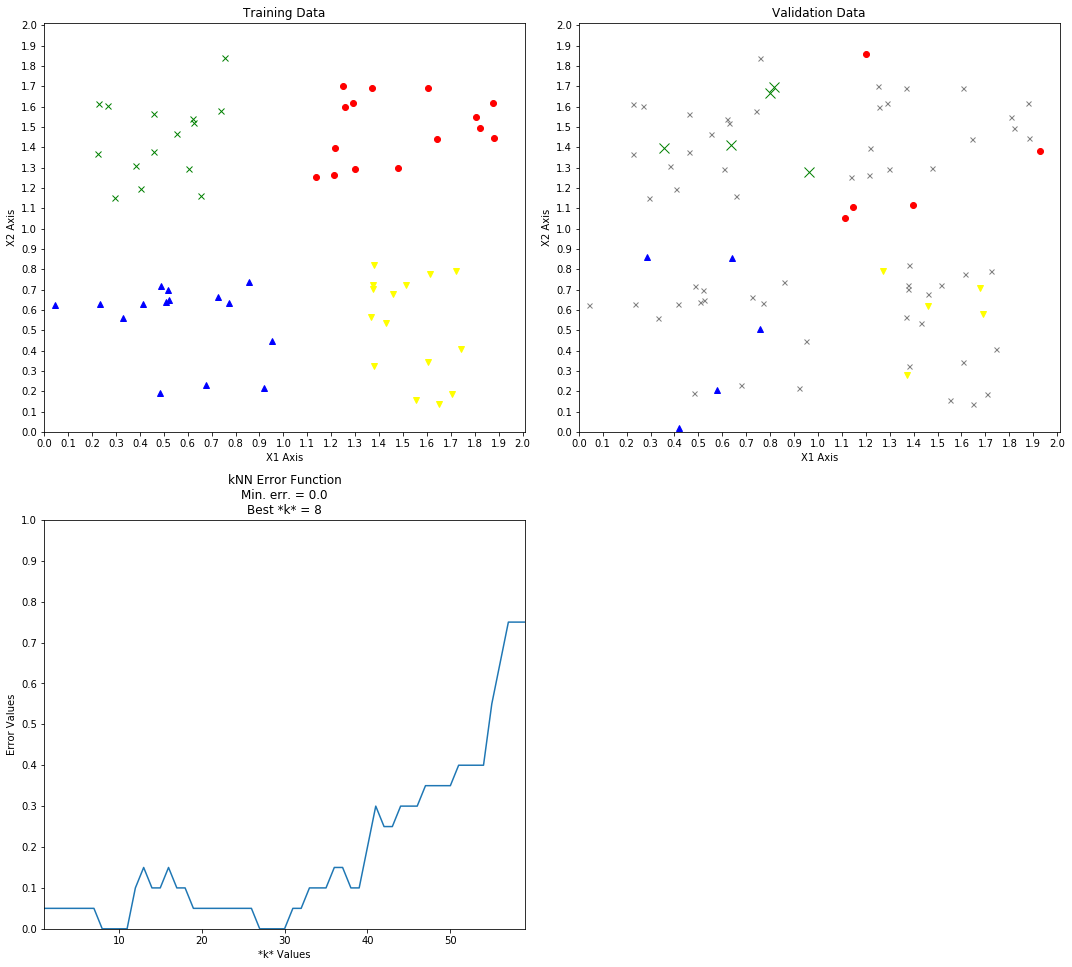

In [13]:
N_v = 5
N_t = 15
training_data = standard_data_generator(N_t, 0.5)
validation_data = standard_data_generator(N_v, 0.6)
fig = plt.figure(figsize=(15, 20))
plot_training_data_only(training_data, 1, N_t)
plot_validation_data(training_data, validation_data, 2, N_t, N_v)
plot_knn_errors(training_data, validation_data, 3)
plt.tight_layout()
plt.draw()

# -------------------------------------------UnitTests -------------------------------------------

In [11]:
x1_train = np.array([[1],[1],[4],[2],[2],[-2],[-2],[-3],[-1],[-2]])
x2_train = np.array([[1],[2],[3],[2],[1],[1],[0],[1],[-1],[-2]])
y_train = np.array([[1]]*5 + [[2]]*5)
x1_val = np.array([[3],[4],[1],[-1],[-1]])
x2_val = np.array([[1],[1],[0],[1],[0]])
y_val = np.array([[1]]*3 + [[2]]*2)
N1 = 5
N2 = 10

def clac(x1v, x2v, x1t, x2t):
    return math.sqrt((x1v-x1t)**2 + (x2v - x2t)**2)

def expected_dists():
    expected = list()
    for v in range(N1):
        x1v = x1_val[v, 0]
        x2v = x2_val[v, 0]
        expected.append([clac(x1v,x2v,x1_train[t, 0],x2_train[t, 0]) for t in range(N2)])
    return np.array(expected)
    
class KnnTests(unittest.TestCase):
    
    def test_calculate_distance(self):
        answer = calculate_distance(x1_val.copy(), x2_val.copy(), x1_train.copy(), x2_train.copy())
        expected = expected_dists()
        self.assertEqual(expected.tolist(), answer.tolist())
        
    def test_sort_distances(self):
        answer = sort_distances(expected_dists(), y_train)
        self.assertEqual((N1, N2), answer.shape)
    
    def test_calculate_distribution_knn(self):
        pass

In [12]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_calculate_distance (__main__.KnnTests) ... ok
test_calculate_distribution_knn (__main__.KnnTests) ... ok
test_sort_distances (__main__.KnnTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK
